In [1]:
%tensorflow_version 1.x
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## Q.1 Load Fashion MNIST & Reshape and Normalize the data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
print("The shape of data for train", X_train.shape)

The shape of data for train (60000, 28, 28)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##  Reshape and Normalize the data

In [0]:
img_rows,img_cols = 28,28
X_train = X_train.reshape(X_train.shape[0],img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0],img_rows* img_cols)
input_shape = (img_rows, img_cols, 1)

# change the type of data to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
#normalize pixel data in range (0,1) from (0,255)
X_train = X_train / 255.0
X_test = X_test / 255.0

from tensorflow.keras.utils import to_categorical
num_classes = 10
#normalize target data to categorical for input to NN.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [0]:
class perceptron_model:
  def __init__(self,n_input, n_classes,learning_rate, training_epochs,my_optimizer):
    self.n_input = n_input
    self.n_classes = n_classes
    self.learning_rate = learning_rate
    self.training_epochs = training_epochs
    self.pred = None

    # tf Graph input
    self.x = tf.placeholder("float", [None, n_input],name="x")
    self.y = tf.placeholder("float", [None, n_classes],name="y")
    self.my_optimizer = my_optimizer
  
  def get_predictor(self):# to define single/multi NN
    return None

  def train_nn_model(self):
    self.pred = self.get_predictor()
    if self.pred == None:
      print("Predictor Not defined.")
      return

    # Define loss and optimizer
    self.cost_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.pred, labels=self.y))
    self.optimizer_fn = self.my_optimizer(learning_rate=self.learning_rate).minimize(self.cost_fn)
    
    # Initializing the variables
    init = tf.global_variables_initializer()
    #create an empty list to store the cost history and accuracy history
    cost_history = []
    accuracy_history = []


    display_step = 200
    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Training cycle
        for epoch in range(self.training_epochs):
            # Run optimization & cost funtion
            _, cost = sess.run([self.optimizer_fn, self.cost_fn], feed_dict={self.x: X_train,self.y: y_train})
            
            if epoch % display_step == 0:
                correct_prediction = tf.equal(tf.argmax(self.pred, 1), tf.argmax(self.y, 1))
                # Calculate accuracy
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                acu_temp = accuracy.eval({self.x: X_test, self.y: y_test})
                #append the accuracy to the list
                accuracy_history.append(acu_temp)
                #append the cost history
                cost_history.append(cost)
                print("Epoch:", '%04d' % (epoch + 1), "- cost=", "{:.9f}".format(cost), "- Accuracy=",acu_temp)


        print("Optimization Finished!")
        #plot the cost history
        plt.plot(cost_history)
        plt.show()
        #plot the accuracy history
        plt.plot(accuracy_history)
        plt.show()
        # Test model
        correct_prediction = tf.equal(tf.argmax(self.pred, 1), tf.argmax(self.y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Accuracy:", accuracy.eval({self.x: X_test, self.y: y_test}))
      

## Q.2 Define a multi layer perceptron using tensorflow for fashion 

In [0]:
class multi_layer_perceptron(perceptron_model):
  def __init__(self,n_input, n_classes, learning_rate, training_epochs,my_optimizer):
    perceptron_model.__init__(self,n_input, n_classes, learning_rate, training_epochs,my_optimizer)
    # Network Parameters
    self.n_hidden_1 = 256 # 1st layer number of features
    self.n_hidden_2 = 256 # 2nd layer number of features
    self.n_hidden_3 = 256 # 3rd layer number of features
    self.n_hidden_4 = 256 # 4th layer number of features

    # Store layers weight & bias
    self.weights = {
      'h1': tf.Variable(tf.random_normal([self.n_input, self.n_hidden_1])),
      'h2': tf.Variable(tf.random_normal([self.n_hidden_1, self.n_hidden_2])),
      'h3': tf.Variable(tf.random_normal([self.n_hidden_2, self.n_hidden_3])),
      'h4': tf.Variable(tf.random_normal([self.n_hidden_3, self.n_hidden_4])),
      'out': tf.Variable(tf.random_normal([self.n_hidden_4, self.n_classes]))
    }
    self.biases = {
      'b1': tf.Variable(tf.random_normal([self.n_hidden_1])),
      'b2': tf.Variable(tf.random_normal([self.n_hidden_2])),
      'b3': tf.Variable(tf.random_normal([self.n_hidden_3])),
      'b4': tf.Variable(tf.random_normal([self.n_hidden_4])),
      'out': tf.Variable(tf.random_normal([self.n_classes]))
    }


 #Create multi-layer perceptron model
  def get_predictor(self):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(self.x, self.weights['h1']), self.biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, self.weights['h2']), self.biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, self.weights['h3']), self.biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, self.weights['h4']), self.biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, self.weights['out']) + self.biases['out']
    return out_layer


## Q.3 Define a Single layer perceptron using tensorflow for fashion 

In [0]:
class single_layer_perceptron(perceptron_model):
  def __init__(self,n_input, n_classes, learning_rate, training_epochs,my_optimizer):
    perceptron_model.__init__(self,n_input, n_classes, learning_rate, training_epochs,my_optimizer)
    # Network Parameters
    self.n_hidden_1 = 256 # 1st layer number of features
    
    # Store layers weight & bias
    self.weights = {
      'h1': tf.Variable(tf.random_normal([self.n_input, self.n_hidden_1])),
      'out': tf.Variable(tf.random_normal([self.n_hidden_1, self.n_classes]))
    }
    self.biases = {
      'b1': tf.Variable(tf.random_normal([self.n_hidden_1])),
      'out': tf.Variable(tf.random_normal([self.n_classes]))
    }


 #Create single-layer perceptron model
  def get_predictor(self):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(self.x, self.weights['h1']), self.biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, self.weights['out']) + self.biases['out']
    return out_layer


## Q4 Initiate the training with different optimizers.

In [0]:
n_input = 784 # MNIST fashion data input (img shape: 28*28)
# MNIST total classes (T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
n_classes = 10

## Multi Layer Perceptron Model with GradientDescentOptimizer & AdamOpitmizer

Training MLP with GradientDescentOptimizer
Epoch: 0001 - cost= 194.181106567 - Accuracy= 0.122
Epoch: 0201 - cost= 43.349071503 - Accuracy= 0.3742
Epoch: 0401 - cost= 31.440103531 - Accuracy= 0.4727
Epoch: 0601 - cost= 25.910541534 - Accuracy= 0.5233
Epoch: 0801 - cost= 22.480371475 - Accuracy= 0.5588
Epoch: 1001 - cost= 20.125013351 - Accuracy= 0.5807
Epoch: 1201 - cost= 18.419265747 - Accuracy= 0.5991
Epoch: 1401 - cost= 17.129316330 - Accuracy= 0.6166
Epoch: 1601 - cost= 16.114797592 - Accuracy= 0.6304
Epoch: 1801 - cost= 15.291001320 - Accuracy= 0.6438
Optimization Finished!


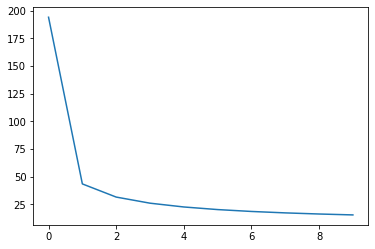

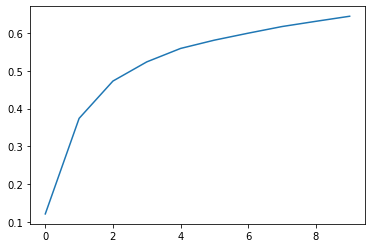

Accuracy: 0.6518
Training MLP with AdampOptimizer
Epoch: 0001 - cost= 222.471435547 - Accuracy= 0.1349
Epoch: 0201 - cost= 10.971575737 - Accuracy= 0.7141
Epoch: 0401 - cost= 7.269620895 - Accuracy= 0.7669
Epoch: 0601 - cost= 5.416084766 - Accuracy= 0.7894
Epoch: 0801 - cost= 4.189482689 - Accuracy= 0.8036
Epoch: 1001 - cost= 3.321231842 - Accuracy= 0.8101
Epoch: 1201 - cost= 2.677579641 - Accuracy= 0.8135
Epoch: 1401 - cost= 2.184933424 - Accuracy= 0.8197
Epoch: 1601 - cost= 1.817395806 - Accuracy= 0.82
Epoch: 1801 - cost= 1.527432561 - Accuracy= 0.8239
Optimization Finished!


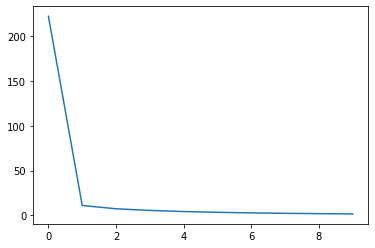

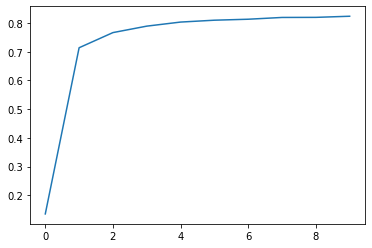

Accuracy: 0.8236


In [10]:
learning_rate = 0.001
training_epochs = 2000
## multilayer perceptron with GradientDescentOptimizer
obj1 = multi_layer_perceptron(n_input,n_classes,learning_rate,training_epochs,my_optimizer=tf.train.GradientDescentOptimizer)
print("Training MLP with GradientDescentOptimizer")
obj1.train_nn_model()
del(obj1)
## multilayer perceptron with AdamOptimizer
obj2 = multi_layer_perceptron(n_input,n_classes,learning_rate,training_epochs,tf.train.AdamOptimizer)
print("Training MLP with AdampOptimizer")
obj2.train_nn_model()
del(obj2)

## Single Layer Perception for fashion_MNIST

Training SLP with GradientDescentOptimizer
Epoch: 0001 - cost= 251.092269897 - Accuracy= 0.0465
Epoch: 0201 - cost= 148.718566895 - Accuracy= 0.0817
Epoch: 0401 - cost= 100.374694824 - Accuracy= 0.1116
Epoch: 0601 - cost= 79.623130798 - Accuracy= 0.1458
Epoch: 0801 - cost= 69.046363831 - Accuracy= 0.1857
Epoch: 1001 - cost= 62.274623871 - Accuracy= 0.2222
Epoch: 1201 - cost= 57.122001648 - Accuracy= 0.2477
Epoch: 1401 - cost= 52.872970581 - Accuracy= 0.2722
Epoch: 1601 - cost= 49.279582977 - Accuracy= 0.2931
Epoch: 1801 - cost= 46.232887268 - Accuracy= 0.3141
Epoch: 2001 - cost= 43.636455536 - Accuracy= 0.3349
Epoch: 2201 - cost= 41.408496857 - Accuracy= 0.353
Epoch: 2401 - cost= 39.487518311 - Accuracy= 0.3661
Epoch: 2601 - cost= 37.820060730 - Accuracy= 0.3811
Epoch: 2801 - cost= 36.362617493 - Accuracy= 0.3963
Epoch: 3001 - cost= 35.082351685 - Accuracy= 0.4093
Epoch: 3201 - cost= 33.943885803 - Accuracy= 0.4217
Epoch: 3401 - cost= 32.921211243 - Accuracy= 0.4304
Epoch: 3601 - cost=

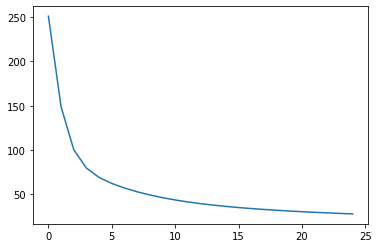

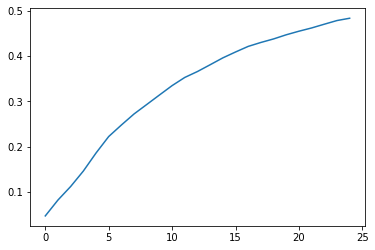

Accuracy: 0.4903
Training SLP with AdampOptimizer
Epoch: 0001 - cost= 362.241363525 - Accuracy= 0.1026
Epoch: 0201 - cost= 77.482597351 - Accuracy= 0.2054
Epoch: 0401 - cost= 36.243938446 - Accuracy= 0.3949
Epoch: 0601 - cost= 24.291612625 - Accuracy= 0.5292
Epoch: 0801 - cost= 19.480812073 - Accuracy= 0.5989
Epoch: 1001 - cost= 16.655870438 - Accuracy= 0.6368
Epoch: 1201 - cost= 14.659387589 - Accuracy= 0.6592
Epoch: 1401 - cost= 13.050638199 - Accuracy= 0.6813
Epoch: 1601 - cost= 11.918751717 - Accuracy= 0.6986
Epoch: 1801 - cost= 11.019535065 - Accuracy= 0.7115
Epoch: 2001 - cost= 10.262197495 - Accuracy= 0.7233
Epoch: 2201 - cost= 9.592745781 - Accuracy= 0.7321
Epoch: 2401 - cost= 8.999966621 - Accuracy= 0.7398
Epoch: 2601 - cost= 8.470147133 - Accuracy= 0.7464
Epoch: 2801 - cost= 7.992265224 - Accuracy= 0.7519
Epoch: 3001 - cost= 7.561596394 - Accuracy= 0.7582
Epoch: 3201 - cost= 7.162006378 - Accuracy= 0.7649
Epoch: 3401 - cost= 6.786316872 - Accuracy= 0.7708
Epoch: 3601 - cost= 

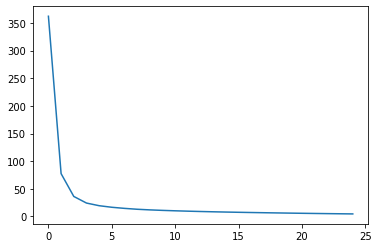

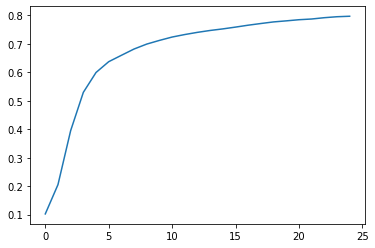

Accuracy: 0.7989


In [11]:
# Parameters
learning_rate = 0.0001
training_epochs = 5000 
## singlelayer perceptron with GradientDescentOptimizer
obj1 = single_layer_perceptron(n_input,n_classes,learning_rate,training_epochs,my_optimizer=tf.train.GradientDescentOptimizer)
print("Training SLP with GradientDescentOptimizer")
obj1.train_nn_model()
del(obj1)
## singlelayer perceptron with AdamOptimizer
obj2 = single_layer_perceptron(n_input,n_classes,learning_rate,training_epochs,tf.train.AdamOptimizer)
print("Training SLP with AdampOptimizer")
obj2.train_nn_model()
del(obj2)